# Education (K-12 Enrollment)

           Neighborhood  K12 Enrollment
1               Carrick            1212
2         Hill District            1136
3             Brookline            1112
4                  West            1090
5                 South            1090
6        Homewood North            1090
7   Wilkinsburg Borough             827
8            East Hills             827
9     Northview Heights             773
10          Spring Hill             773
11          Summer Hill             773
12            Arlington             767
13           Mt. Oliver             767
14   Mt. Oliver Borough             767
15    Arlington Heights             767
16            St. Clair             767
17  Squirrel Hill South             751
18       Swisshelm Park             751
19        Regent Square             751
20            Beechview             750


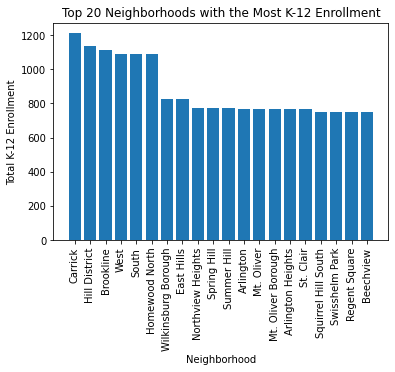

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

education = pd.read_csv('neighborhood_iep.csv')

# Create a new dataframe to hold the exploded neighborhoods
neighborhoods_k12 = pd.DataFrame(columns=['Neighborhood', 'K12 Enrollment'])

for i in range(len(education)):
    neighborhood_str = education.iloc[i]['neighborhoods']
    k12 = education.iloc[i]['total_enrollment_k_12']
    neighborhoods_list = neighborhood_str.split(', ')
    neighborhood = neighborhoods_list[0].strip()
    
    
    # Create a new row for each neighborhood and append to the new dataframe
    for neighborhood in neighborhoods_list:
        neighborhoods_k12.loc[len(neighborhoods_k12)] = [neighborhood, k12]
        
# Sort the neighborhoods by K12 enrollment in descending order and select the top 20
top20_k12 = neighborhoods_k12.sort_values('K12 Enrollment', ascending=False).head(20)


top20_k12 = top20_k12.reset_index(drop = True)
top20_k12.index += 1 
print(top20_k12)

plt.bar(x=top20_k12['Neighborhood'], height=top20_k12['K12 Enrollment'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Total K-12 Enrollment')
plt.title('Top 20 Neighborhoods with the Most K-12 Enrollment')
plt.show()

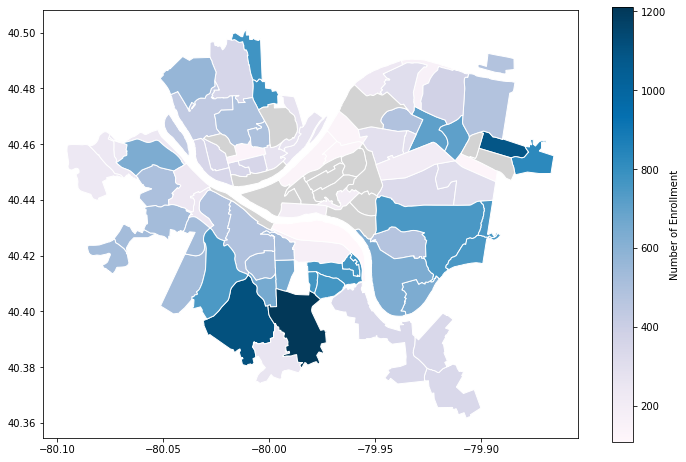

In [15]:
import geopandas

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# do the merge
enrollment_map = neighborhoods.merge(neighborhoods_k12, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
enrollment_map[['hood','K12 Enrollment','geometry']].head()

enrollment_map.plot(column='K12 Enrollment', # set the data to be used for coloring
               cmap='PuBu',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Enrollment"}, # label the legend
               figsize=(12, 8),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )